In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.grid"] = True
plt.rcParams["font.size"] = 12


In [41]:
dns_file = "DNS_nav_resource_metrics.csv"
dot_file = "DOT_nav_resource_metrics.csv"
doh_file = "DOH_nav_resource_metrics.csv"


dns_df = pd.read_csv(dns_file)
dot_df = pd.read_csv(dot_file)
doh_df = pd.read_csv(doh_file)

dns_df["resolver"] = "DNS"
dot_df["resolver"] = "DoT"
doh_df["resolver"] = "DoH"

df = pd.concat([dns_df, dot_df, doh_df], ignore_index=True)

df = df[["url", "resolver", "dom_content_loaded_ms"]].dropna()
df["dom_content_loaded_s"] = df["dom_content_loaded_ms"] / 1000.0
df.head()


,url,resolver,dom_content_loaded_ms,dom_content_loaded_s
0,https://scholar.google.com/,DNS,1515.0,1.515
1,https://www.netflix.com/in/,DNS,3268.0,3.268
2,https://www.wikipedia.org/,DNS,1752.0,1.752
3,https://www.google.com/,DNS,800.0,0.800
4,https://www.internetsociety.org/,DNS,2668.0,2.668


In [42]:

df["domain"] = df["url"].str.replace(r"^https?://(www\.)?", "", regex=True)
df["domain"] = df["domain"].str.split("/").str[0]
print("Added 'domain' column")
df.head()

Added 'domain' column


,url,resolver,dom_content_loaded_ms,dom_content_loaded_s,domain
0,https://scholar.google.com/,DNS,1515.0,1.515,scholar.google.com
1,https://www.netflix.com/in/,DNS,3268.0,3.268,netflix.com
2,https://www.wikipedia.org/,DNS,1752.0,1.752,wikipedia.org
3,https://www.google.com/,DNS,800.0,0.800,google.com
4,https://www.internetsociety.org/,DNS,2668.0,2.668,internetsociety.org


In [43]:
grouped = (
    df.groupby(["domain", "resolver"])["dom_content_loaded_s"]
    .mean()
    .reset_index()
)

pivot_df = grouped.pivot(index="domain", columns="resolver", values="dom_content_loaded_s").fillna(0)
pivot_df


resolver,DNS,DoH,DoT
domain,,,
amazon.com,4.988,6.064,5.800
example.com,4.745,5.978,5.830
github.com,1.867,2.369,2.243
google.com,0.800,1.267,1.213
iitgn.ac.in,6.992,8.682,8.522
internetsociety.org,2.668,3.834,3.559
nationalgeographic.com,5.284,5.780,5.738
netflix.com,3.268,4.140,3.894
scholar.google.com,1.515,3.951,3.519


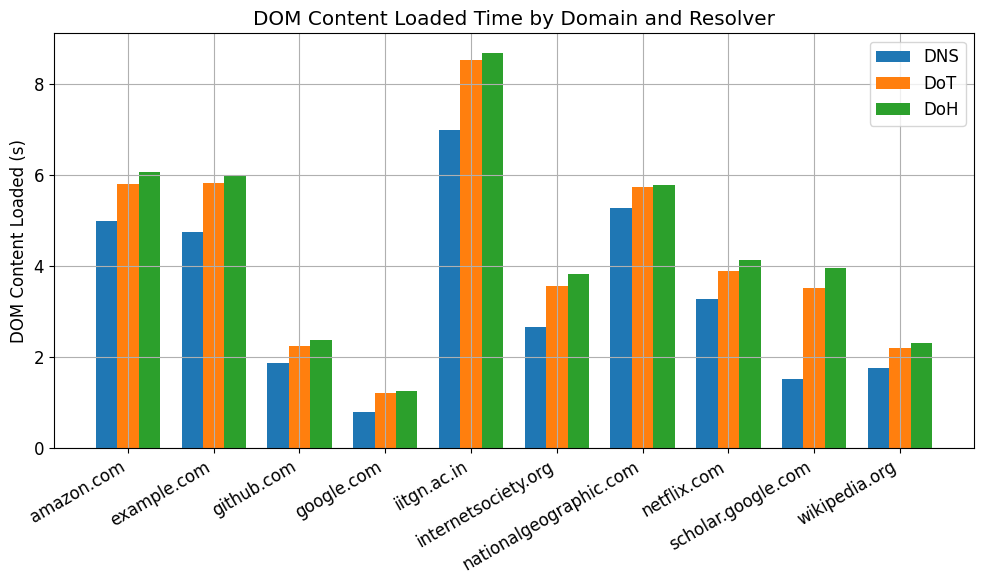

In [44]:
resolvers = ["DNS", "DoT", "DoH"]
x = np.arange(len(pivot_df.index))
bar_width = 0.25

fig, ax = plt.subplots()

for i, resolver in enumerate(resolvers):
    if resolver in pivot_df.columns:
        ax.bar(x + i * bar_width, pivot_df[resolver], bar_width, label=resolver)

ax.set_xticks(x + bar_width)
ax.set_xticklabels(pivot_df.index, rotation=30, ha="right")
ax.set_ylabel("DOM Content Loaded (s)")
ax.set_title("DOM Content Loaded Time by Domain and Resolver")
ax.legend()

plt.tight_layout()
plt.show()


In [45]:
pivot_df.to_csv("dom_content_loaded_comparison_by_domain.csv", index=True)
